<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/random_forest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [3]:
# read the data
df = pd.read_csv("/content/Company_Data (1).csv")

In [4]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df['ShelveLoc'] = df['ShelveLoc'].astype('category')

In [8]:
df['Urban'] = df['Urban'].astype('category')

In [9]:
df['US'] = df['US'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [11]:
df.shape

(400, 11)

In [12]:
df.insert(11,'Sales_class',"")

for i in range(0,len(df['Sales']),1):
  if df['Sales'].iloc[i]<=7.5:
    df['Sales_class'].iloc[i]='low'
  else:
    df['Sales_class'].iloc[i]='high'


<ipython-input-12-e7a00027d2ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_class'].iloc[i]='high'
<ipython-input-12-e7a00027d2ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_class'].iloc[i]='low'


In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low


In [14]:
df.drop(['Sales'],axis=1,inplace=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low


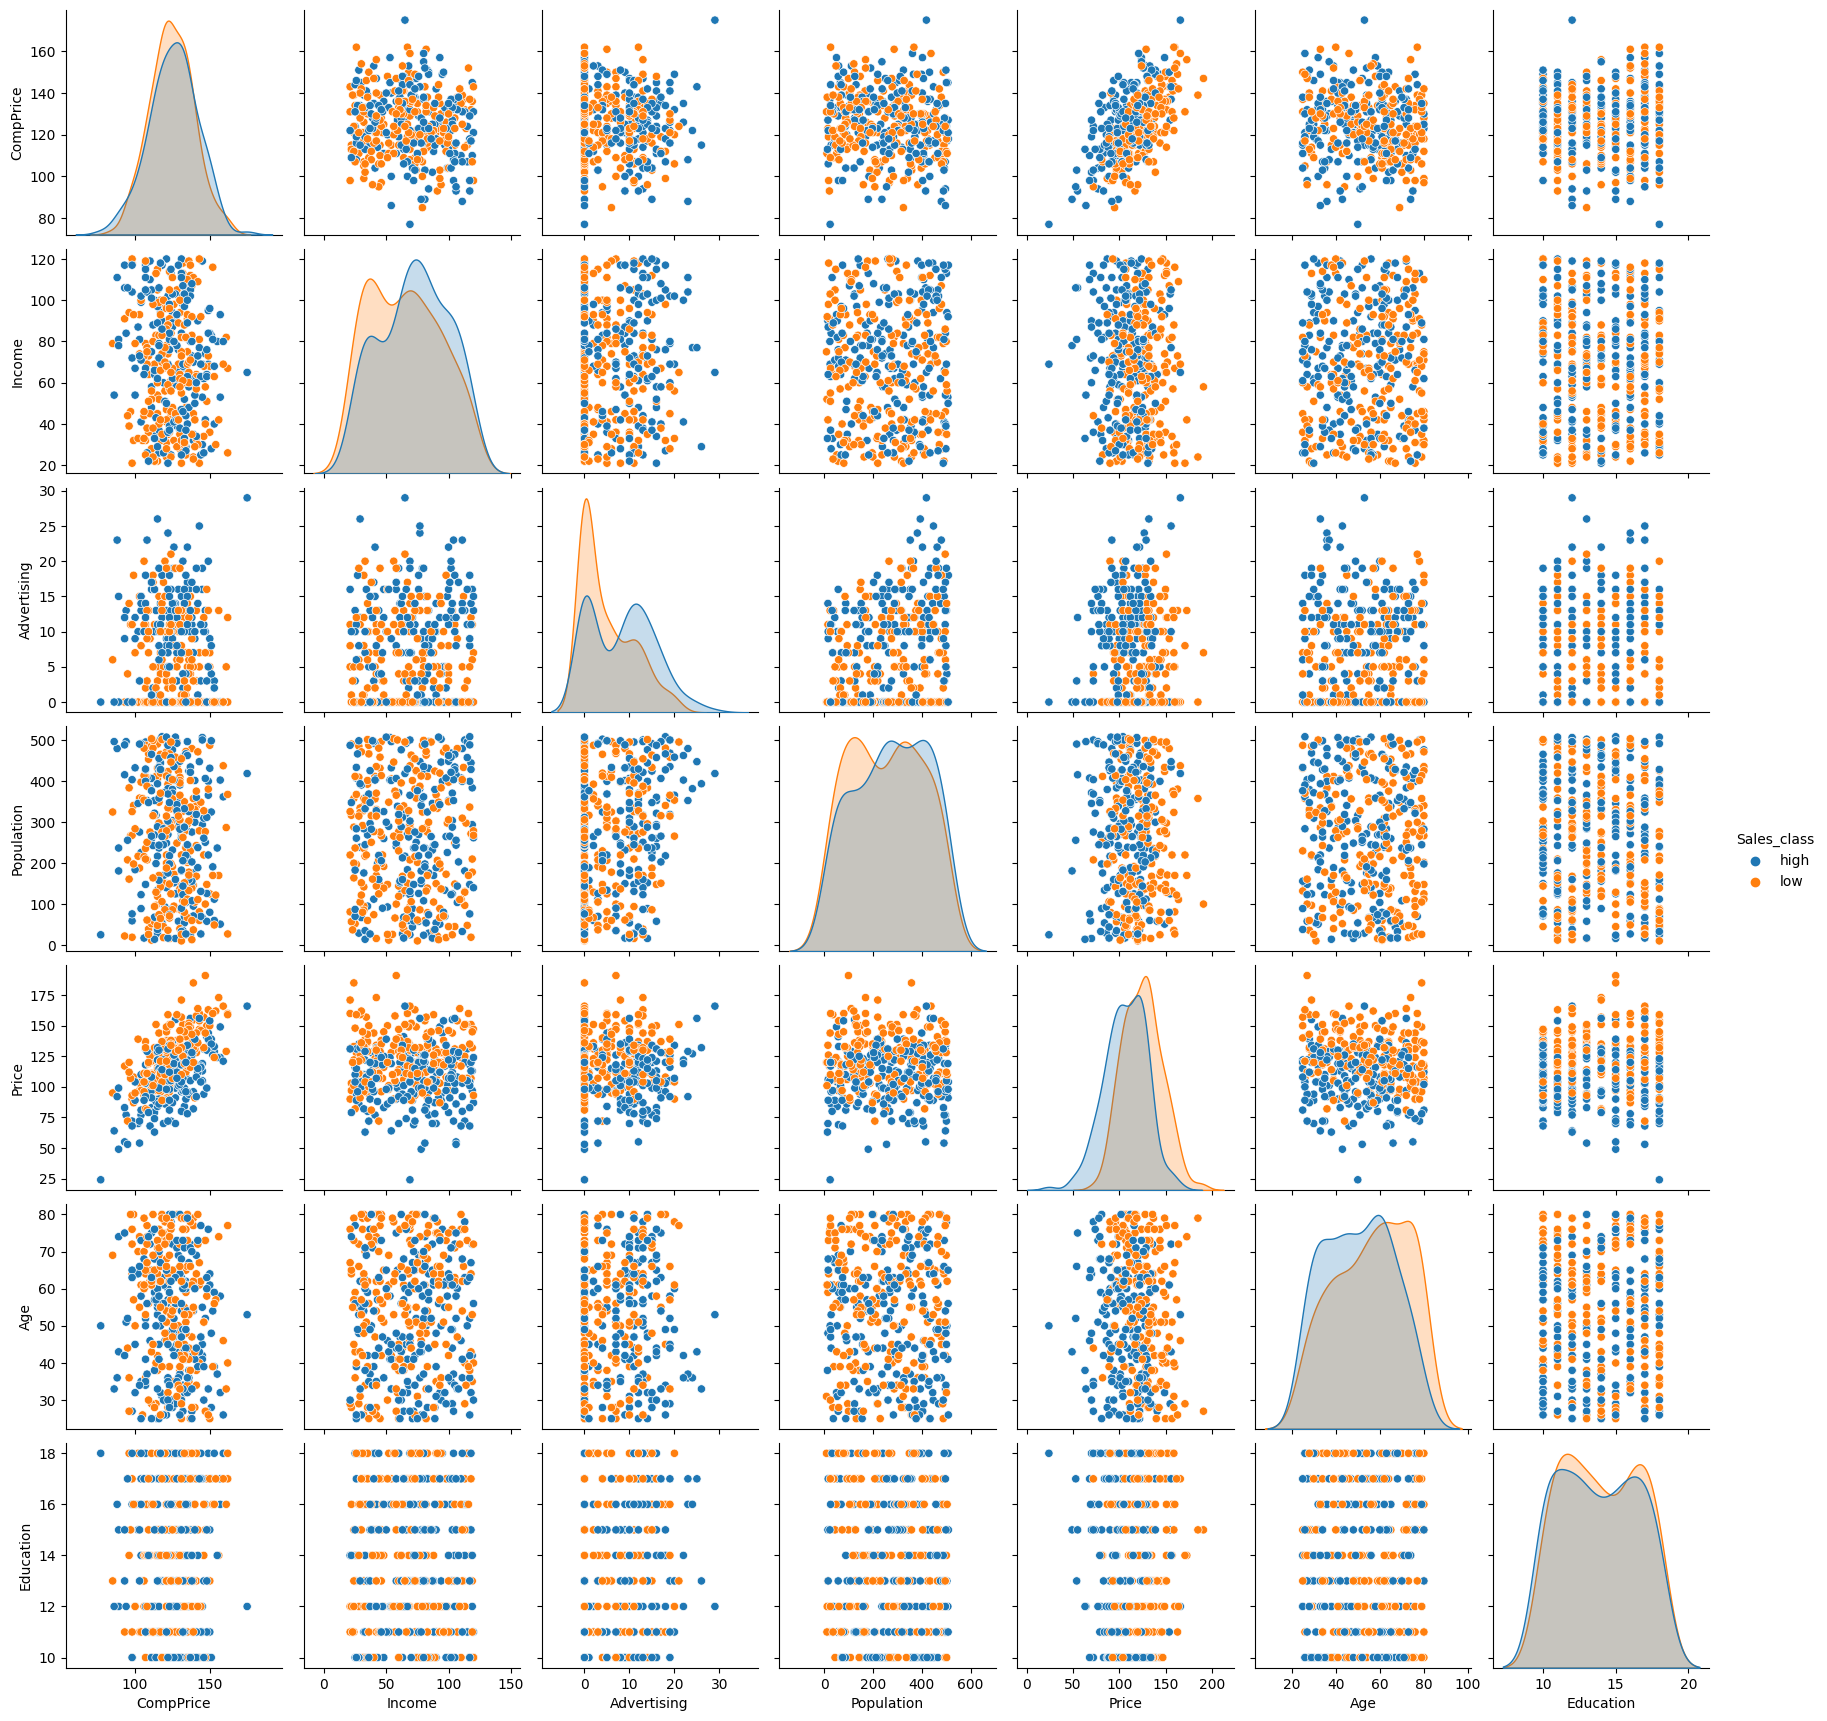

In [15]:
import seaborn as sns
sns.pairplot(data=df , hue='Sales_class')

In [16]:
df['US'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [18]:
df['US'] = label_encoder.fit_transform(df['US'])

df['US'].unique()

array([1, 0])

In [19]:
df['Urban'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [20]:
df['Urban'] = label_encoder.fit_transform(df['Urban'])

df['Urban'].unique()

array([1, 0])

In [21]:
df['ShelveLoc'].unique()

['Bad', 'Good', 'Medium']
Categories (3, object): ['Bad', 'Good', 'Medium']

In [22]:
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])

df['ShelveLoc'].unique()

array([0, 1, 2])

In [23]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,high
396,139,23,3,37,120,2,55,11,0,1,low
397,162,26,12,368,159,2,40,18,1,1,low
398,100,79,7,284,95,0,50,12,1,1,low


In [24]:
df['Sales_class']=label_encoder.fit_transform(df['Sales_class'])

In [25]:
# split data into training and testing data

In [26]:
X = df.iloc[:,0:-1]
y=df['Sales_class']

In [27]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [28]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales_class, Length: 400, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [30]:
X_test.shape,X_train.shape

((80, 10), (320, 10))

In [31]:
y_test.shape,y_train.shape

((80,), (320,))

build ensemble models

In [32]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

## **bagging model - bagging classifier**

In [33]:
base_model = LogisticRegression()

In [34]:
bagging_clf = BaggingClassifier(base_estimator=base_model,n_estimators=30)

In [35]:
bagging_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=30)

In [36]:
bagg_pred = bagging_clf.predict(X_test)

In [37]:
confusion_matrix(y_test,bagg_pred)

array([[35,  8],
       [ 8, 29]])

In [38]:
print(classification_report(y_test,bagg_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        43
           1       0.78      0.78      0.78        37

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [71]:
fpr , tpr , thresh = roc_curve(y_test,bagg_pred)


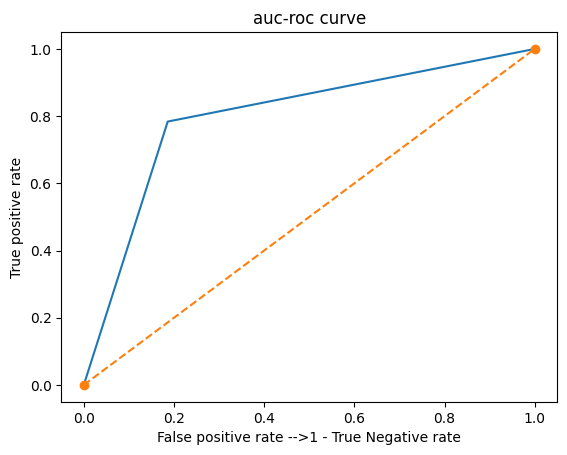

In [72]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.xlabel("False positive rate -->1 - True Negative rate")
plt.ylabel("True positive rate")
plt.title("auc-roc curve")
plt.show()

**RANDOM FOREST**

In [39]:
rf_model = RandomForestClassifier(n_estimators=50,max_depth=12,max_features=3)

In [40]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features=3, n_estimators=50)

In [41]:
train_predicted = rf_model.predict(X_train)

In [42]:
confusion_matrix(y_train , train_predicted)

array([[155,   0],
       [  0, 165]])

In [43]:
print(classification_report(y_train , train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       165

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [44]:
test_predicted = rf_model.predict(X_test)

In [45]:
confusion_matrix(y_test,test_predicted)

array([[36,  7],
       [ 7, 30]])

In [46]:
print(classification_report(y_test , test_predicted))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.81      0.81      0.81        37

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



In [69]:
fpr , tpr , thresh = roc_curve(y_test,test_predicted)



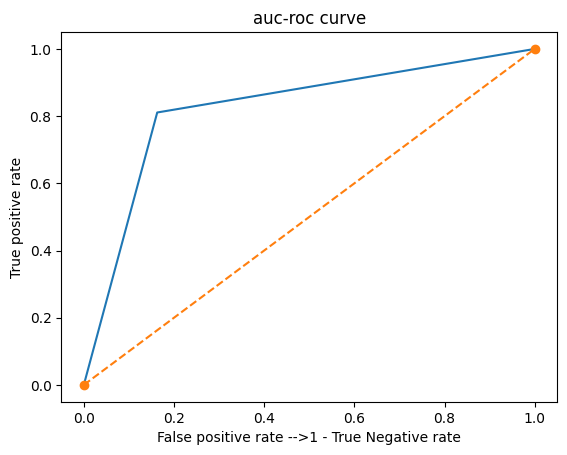

In [70]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.xlabel("False positive rate -->1 - True Negative rate")
plt.ylabel("True positive rate")
plt.title("auc-roc curve")
plt.show()

ADBOOST CLASSIFIER

In [47]:

adb_clf = AdaBoostClassifier(n_estimators=50)

In [48]:
adb_clf.fit(X_train,y_train)

AdaBoostClassifier()

In [49]:
adb_pred = adb_clf.predict(X_test)

In [50]:
confusion_matrix(y_test,adb_pred)

array([[38,  5],
       [ 7, 30]])

In [51]:
print(classification_report(y_test,adb_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        43
           1       0.86      0.81      0.83        37

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [67]:
fpr , tpr , thresh = roc_curve(y_test,adb_pred)

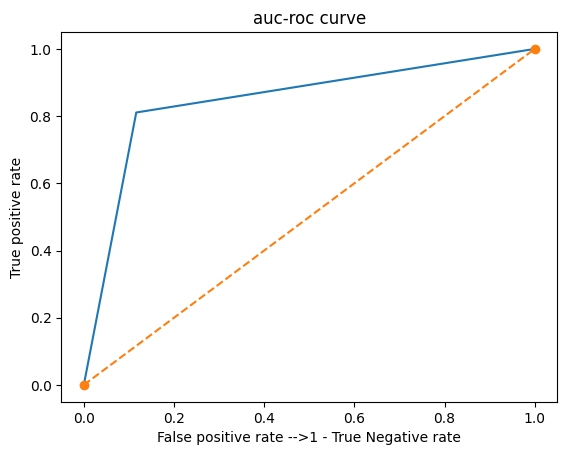

In [68]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.xlabel("False positive rate -->1 - True Negative rate")
plt.ylabel("True positive rate")
plt.title("auc-roc curve")
plt.show()

STACKING

In [52]:
estimators = []

BUILD THE BASE MODEL

In [53]:
model_1 = LogisticRegression()
estimators.append(('logreg', model_1))


In [54]:
model_2 = SVC()
estimators.append(('svm', model_2))

In [55]:
model_3 = DecisionTreeClassifier(max_depth=3)
estimators.append(('decision tree',model_3))

In [56]:
len(estimators)

3

BUILD ENSEMBLE MODEL

In [57]:
model = VotingClassifier(estimators)

In [58]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logreg', LogisticRegression()), ('svm', SVC()),
                             ('decision tree',
                              DecisionTreeClassifier(max_depth=3))])

In [59]:
st_pred = model.predict(X_test)

In [60]:
confusion_matrix(y_test,st_pred)

array([[34,  9],
       [11, 26]])

In [61]:
print(classification_report(y_test,st_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        43
           1       0.74      0.70      0.72        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



AUC-ROC CURVE

In [63]:
from sklearn.metrics import roc_curve

In [64]:
fpr , tpr , thresh = roc_curve(y_test,st_pred)

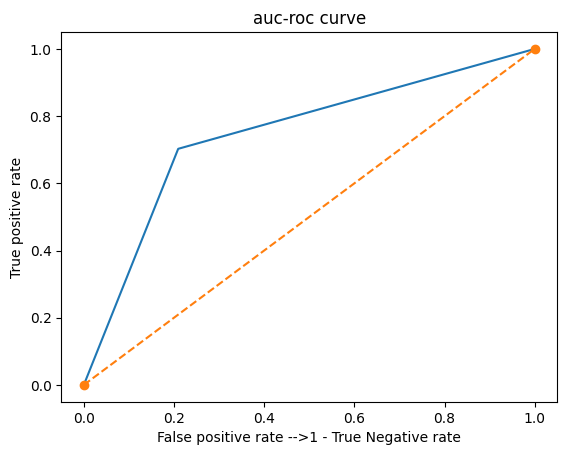

In [65]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.xlabel("False positive rate -->1 - True Negative rate")
plt.ylabel("True positive rate")
plt.title("auc-roc curve")
plt.show()

In [73]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,StackingRegressor

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

bagging regressor

In [75]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()

In [76]:
bagging_reg = BaggingRegressor(base_estimator=base_model,n_estimators=50)

In [77]:
bagging_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50)

In [78]:
begg_pred = bagging_reg.predict(X_test)

get metrics

In [79]:
mean_squared_error(y_test,begg_pred)

0.1579437820366046

In [80]:
r2_score(y_test,begg_pred)

0.36465103391937803

random forest regressor

In [81]:
rfr_model = RandomForestRegressor(n_estimators=50,max_depth=12,max_features=3)

In [82]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, max_features=3, n_estimators=50)

In [83]:
rfr_pred = rfr_model.predict(X_test)

In [84]:
mean_squared_error(y_test,rfr_pred)

0.13844737518234304

In [85]:
r2_score(y_test,rfr_pred)


0.4430778119629192